In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import importlib

import clustering, utilities, recs_preprocessing

importlib.reload(clustering)
importlib.reload(utilities)
importlib.reload(recs_preprocessing)

from utilities import KWH2BTU, BTU2KWH, SQF2SQM, SQM2SQF, THM2BTU, BTU2THM
from recs_preprocessing import Codebook, df_computed
from clustering import cluster_evaluation_subset, evaluate_gmm, evaluate_gmm_weighted, evaluate_lightgbm

def energy_loads_features():
    categorical_columns = []
    continuous_columns = [
        'RC_equipment_power_density', 'RC_gas_power_density', 'RC_DHW_elec_power_density',
        'RC_DHW_gas_power_density', 'RC_lighting_power_density']
    return categorical_columns, continuous_columns

def construction_features():
    categorical_columns = [
        'CELLAR', 'CRAWL', 'CONCRETE', 'BASEOTH', 'BASEFIN', 'ATTIC',
        'ATTICFIN', 'WALLTYPE', 'ROOFTYPE', 'ADQINSUL', 'TYPEGLASS', 'WINFRAME']
    continuous_columns = [
        'eui_kwh_elec_thermal', 'eui_btu_ng_thermal', 'eui_btu_ofuel_thermal', 'window_per_sqm', 'door_per_sqm'
    ]
    return categorical_columns, continuous_columns

def systems_features():
    # systems
    categorical_columns = [
        'EQUIPM', 'FUELHEAT', 'BASEHEAT', 'GARGHEAT', 'ATTCHEAT', 'GEOHP',
        'AIRCOND', 'COOLAPT', 'ACEQUIPM_PUB', 'BASECOOL', 'ATTCCOOL', 'GARGCOOL', 'EQUIPAGE', 'ACEQUIPAGE'
    ] # systems -> heating and cooling system
    continuous_columns = [
        'eui_kwh_elec_sph', 'eui_btu_ng_sph', 'eui_btu_ofuel_sph',
        'eui_kwh_elec_col', 'eui_kwh_elec_latent'
    ]
    return categorical_columns, continuous_columns


100%|██████████| 9/9 [02:17<00:00, 15.28s/it]


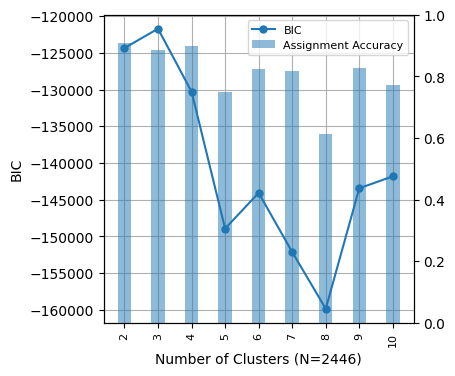

In [4]:
categorical_columns, continuous_columns = construction_features()
subset_criteria = {
    'IECC_climate_code': '4A',
    'TYPEHUQ': 2
}
fig, ax = plt.subplots(figsize=(4, 4))
da, metrics = cluster_evaluation_subset(categorical_columns, continuous_columns, subset_criteria,
                                        evaluate_gmm_weighted, ax,
                                n_max=10)

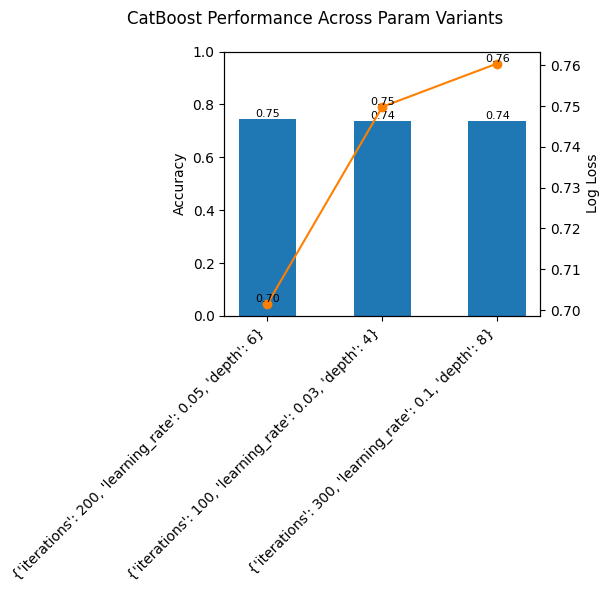

In [18]:
from clustering import evaluate_catboost
result = evaluate_catboost(metrics[3], da.index)

In [20]:
result[0]

,Params,Accuracy,Log Loss
1,"{'iterations': 200, 'learning_rate': 0.05, 'de...",0.746529,0.701528
0,"{'iterations': 100, 'learning_rate': 0.03, 'de...",0.738760,0.749805
2,"{'iterations': 300, 'learning_rate': 0.1, 'dep...",0.736309,0.760418


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 11
[LightGBM] [Info] Start training from score -2.993689
[LightGBM] [Info] Start training from score -2.860158
[LightGBM] [Info] Start training from score -0.978786
[LightGBM] [Info] Start training from score -3.646831
[LightGBM] [Info] Start training from score -0.711724
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

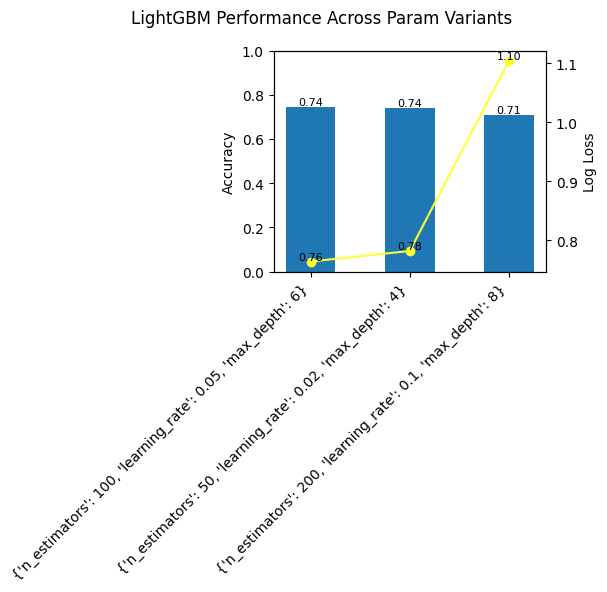

In [22]:
result = evaluate_lightgbm(metrics[3], da.index)

In [16]:
result[1]

[LGBMClassifier(learning_rate=0.02, max_depth=4, n_estimators=50),
 LGBMClassifier(learning_rate=0.02, max_depth=4, n_estimators=50),
 LGBMClassifier(learning_rate=0.02, max_depth=4, n_estimators=50),
 LGBMClassifier(learning_rate=0.02, max_depth=4, n_estimators=50),
 LGBMClassifier(learning_rate=0.02, max_depth=4, n_estimators=50),
 LGBMClassifier(learning_rate=0.05, max_depth=6),
 LGBMClassifier(learning_rate=0.05, max_depth=6),
 LGBMClassifier(learning_rate=0.05, max_depth=6),
 LGBMClassifier(learning_rate=0.05, max_depth=6),
 LGBMClassifier(learning_rate=0.05, max_depth=6),
 LGBMClassifier(max_depth=8, n_estimators=200),
 LGBMClassifier(max_depth=8, n_estimators=200),
 LGBMClassifier(max_depth=8, n_estimators=200),
 LGBMClassifier(max_depth=8, n_estimators=200),
 LGBMClassifier(max_depth=8, n_estimators=200)]